In [1]:
import numpy as np
import scipy
import scipy.stats as st
from matplotlib import pyplot as plt

In [2]:
import os
os.getcwd()

'/Users/kraml/Programs/Lilith-Run2database/Validations'

In [3]:
# --- read digitized 2d exp. contours for valdation, from Loc ---

os.chdir('/Users/kraml/Programs/Lilith-1.2.0.beta/validation/ATLAS/')
dt = np.dtype([('cx', float), ('cy', float)])
expCont = np.genfromtxt('HIGG-2016-21_2d_mu_contour.txt', dtype=dt)

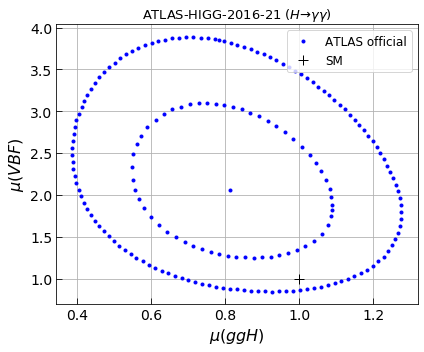

In [45]:
# --- 2d plot of mu(ggH) vs mu(VBF) ---

CLvals = [0,2.3,5.99,11.83]

fig = plt.figure(figsize=(6,5))
plt.grid()
#plt.contourf(xi, yi, Lxy, levels=CLvals, colors=['red','orange','yellow'], alpha=0.7)
#cntrLines=plt.contour(xi, yi, Lxy, levels=CLvals, colors='black', linewidths=1)
#plt.clabel(cntrLines, inline=True, fmt='%0.2f', fontsize=12)
plt.plot(expCont['cx'],expCont['cy'], '.', c='b', label='ATLAS official')
plt.plot([1],[1], '+', c='k', markersize=10, label='SM')
plt.xlabel(r'$\mu(ggH)$',fontsize=16)
plt.ylabel(r'$\mu(VBF)$',fontsize=16)
plt.tick_params(axis='both', direction='in', length=6, which='both', labelsize=14)
plt.title(r'ATLAS-HIGG-2016-21 ($H\to\gamma\gamma$)',fontsize=13)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
#fig.savefig('ATLAS-HIGG-2016-21_2Dmu-wcorrelations.png', dpi=300)

In [5]:
# --- define Log Likelihood functions ---

def VGaussLL(z1, z2, z10, sig1p, sig1m, z20, sig2p, sig2m, rho):
    V1 = sig1p*sig1m
    V1e = sig1p - sig1m
    V2 = sig2p * sig2m
    V2e = sig2p - sig2m
    V1f = V1 + V1e*(z1-z10)
    V2f = V2 + V2e * (z2 - z20)
    L2t = 1/(1-rho**2)*((z1-z10)**2/V1f-2*rho*(z1-z10)*(z2-z20)/np.sqrt(V1f*V2f)+(z2-z20)**2/V2f)
    return L2t

def NGaussLL(z1, z2, z10, z20, a, b, c):
    L2t = a*(z10-z1)**2 + c*(z20-z2)**2 + (2*b*(z10-z1)*(z20-z2))
    return L2t

In [22]:
# --- make grid for 2d map of mu(ggH) vs mu(VBF) ---

x = np.linspace(0.2, 1.4, 100, endpoint = True)
y = np.linspace(0.5, 4, 100, endpoint = True)
xi, yi = np.meshgrid(x, y)

In [23]:
# --- now the explicit 2d maps of mu(ggH) vs mu(VBF) ---

# using values from Fig 12

(x0, sxp, sxm) = (0.81, 0.19, 0.18) 
(y0, syp, sym) = (2.0, 0.6, 0.5) 
corr = -0.27

LLfromFig12=[]
for xj,yj in zip(xi,yi):
    tmp=[]
    for x_,y_ in zip(xj,yj):
        tmp.append(VGaussLL(x_,y_, x0, sxp, sxm, y0, syp, sym, corr))
    LLfromFig12.append(tmp)
    
# using Loc's fit from Fig 15

(x0, sxp, sxm) = (0.812281569, 0.185154007923, 0.177361357316) 
(y0, syp, sym) = (2.055330645, 0.664606029766, 0.55544614525) 
corr = -0.24364227856

LLfromFig15=[]
for xj,yj in zip(xi,yi):
    tmp=[]
    for x_,y_ in zip(xj,yj):
        tmp.append(VGaussLL(x_,y_, x0, sxp, sxm, y0, syp, sym, corr))
    LLfromFig15.append(tmp)    
    
# using bivariate Gussian fit to 68% CL contour

(x0, y0) = (0.8133583,2.15217654)
LLfromN68=[]
for xj,yj in zip(xi,yi):
    tmp=[]
    for x_,y_ in zip(xj,yj):
        tmp.append(NGaussLL(x_, y_, x0, y0, 33.217432,2.36640578,2.88269749))
    LLfromN68.append(tmp)        

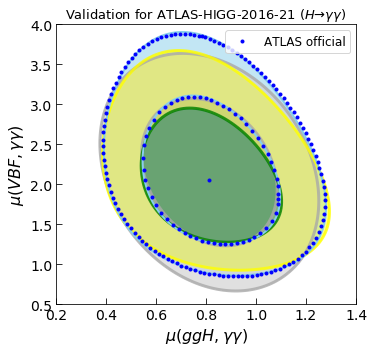

In [44]:
CLvals = [0,2.3,5.99]

fig = plt.figure(figsize=(5.3,5))

plt.contourf(xi, yi, LLfromFig15, levels=CLvals, colors=['skyblue','skyblue'], alpha=0.5)
plt.contourf(xi, yi, LLfromN68, levels=CLvals, colors=['darkgray','lightgray'], alpha=0.7)
plt.contourf(xi, yi, LLfromFig12, levels=CLvals, colors=['green','yellow'], alpha=0.4)

plt.contour(xi, yi, LLfromN68, levels=CLvals, colors=['black','darkgray','darkgrey'], linewidths=3, alpha=0.8)
plt.contour(xi, yi, LLfromFig12, levels=CLvals, colors=['black','green','yellow'], linewidths=3, alpha=0.8)
plt.contour(xi, yi, LLfromFig15, levels=CLvals, colors=['black','skyblue','skyblue'], linewidths=2)

plt.plot(expCont['cx'],expCont['cy'], '.', c='b', label='ATLAS official')
plt.xlabel(r'$\mu(ggH,\gamma\gamma)$',fontsize=16)
plt.ylabel(r'$\mu(VBF,\gamma\gamma)$',fontsize=16)
plt.tick_params(axis='both', direction='in', length=6, which='both', labelsize=14)
plt.title(r'Validation for ATLAS-HIGG-2016-21 ($H\to\gamma\gamma$)',fontsize=13)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()

#fig.savefig('ATLAS-HIGG-2016-21_2D-mu.png', dpi=300)